<a href="https://colab.research.google.com/github/imranttsia/Deep-learning/blob/main/Fashion_MNIST_Dataset_Deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Listing 2.1 Loading the MNIST dataset in Keras

In [2]:
#Taking mnist dataset from tensorflow.keras
from tensorflow.keras.datasets import fashion_mnist

#loading dataset of mnist having train images with labels and testing images with labels.
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
#print number number of images and labels available in training dataset
print(len(train_images))
print(len(train_labels))


60000
60000


In [4]:
#print number number of images and labels available in testing dataset
print(len(test_images))
print(len(test_labels))

10000
10000


In [5]:
#presenting test and train dataset shape.
print(test_images.shape)
train_images.shape

(10000, 28, 28)


(60000, 28, 28)

Class Label: 9


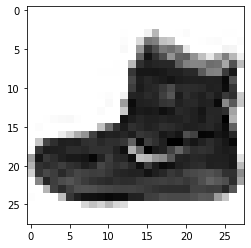

In [6]:
#presenting image and its label of training dataset at index 0 i.e. first image of training dataset
import matplotlib.pyplot as plt

digit = train_images[0]
print("Class Label:",train_labels[0])
#digit.shape

plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

Class Label: 9


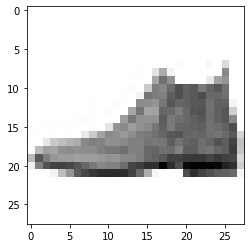

In [7]:
#presenting image and its label of testing dataset at index 0 i.e. first image of testing dataset
digit = test_images[0]
print("Class Label:",test_labels[0])
#digit.shape

plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [8]:
#Printing all the training labels, number of labels and their unique values present in training dataset
import numpy as np
print(train_labels)
print(len(train_labels))
print(np.unique(train_labels))

[9 0 0 ... 3 0 5]
60000
[0 1 2 3 4 5 6 7 8 9]


In [9]:
#Printing all the testing labels, number of labels and their unique values present in testing dataset
import numpy as np
print(test_labels)
print(len(test_labels))
print(np.unique(test_labels))

[9 2 1 ... 8 1 5]
10000
[0 1 2 3 4 5 6 7 8 9]


In [10]:
import numpy as np
#The randint() method returns an integer number selected element from the specified range.
b=np.random.randint(0,255,size=(28,28))
print(b.shape)
#The ravel() function is used to create a contiguous flattened array. A 1-D array, containing the elements of the input, is returned. 
b1=b.ravel()
print(b1.shape)

(28, 28)
(784,)


Listing 2.2 The network architecture

In [11]:
from tensorflow.keras import models
from tensorflow.keras import layers

network = models.Sequential()
#network=model.add(layers.Dense(output,activation_function ,input_shape))
#network=model.add(layers.Dense(512,activation='relu' ,input_shape=(784)))
#just set your last layer activation function with page 114 of Deep learning with python
#This problem is related to Multiclass, sigle label classification(Softmax, categorical_crossentropy)
#Output shound be set with the power of 2

network.add(layers.Dense(512, activation='relu', input_shape=(28*28, )))
network.add(layers.Dense(10, activation='softmax'))

Listing 2.3 The compilation step

In [12]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
#optimizer=rmsprop
#metrics=['f1','precision','accuracy']
#los function=see page 114 of Deep learning with python

In [13]:
# 3 dimensional image image samples,width, heigth
train_images.shape

(60000, 28, 28)

In [14]:
#The ndim is an attribute in the pandas DataFrame which is used to get the integer/number representation of dimensions of the given DataFrame object. 
train_images.ndim


3

In [15]:
#normilization since maximum intensity in gray scale is 255
50/255


0.19607843137254902

Listing 2.4 Preparing the image data

In [16]:
train_images = train_images.reshape((60000, 28 * 28)) #changing into 1D by 28*28 
train_images = train_images.astype('float32') / 255 #Normalization


test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255 #Normalization

Listing 2.5 Preparing the labels

In [17]:
train_labels[0]

9

Class Label: 9


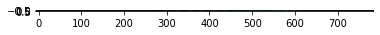

In [18]:
#Coverting 2D(28,28) into 1D(784) and presenting image and its label of testing dataset at index 0 i.e. first image of testing dataset
digit = test_images[0]
print("Class Label:",test_labels[0])
#digit.shape

plt.imshow([digit])
plt.show()

Class Label: 9


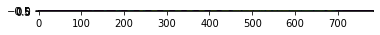

In [19]:
#Coverting 2D(28,28) into 1D(784) and presenting image and its label of training dataset at index 0 i.e. first image of training dataset
digit = train_images[0]
print("Class Label:",train_labels[0])
#digit.shape

plt.imshow([digit])
plt.show()

In [20]:
print(train_images.shape)
print(test_images.shape)


(60000, 784)
(10000, 784)


One-Hot-Encoding

In [21]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [22]:
train_labels[0]


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

Now Train your Model

In [23]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 3s 6ms/step - loss: 0.5602 - accuracy: 0.8026
Epoch 2/5
469/469 [==============================] - 3s 6ms/step - loss: 0.3813 - accuracy: 0.8602
Epoch 3/5
469/469 [==============================] - 3s 6ms/step - loss: 0.3380 - accuracy: 0.8752
Epoch 4/5
469/469 [==============================] - 3s 6ms/step - loss: 0.3113 - accuracy: 0.8865
Epoch 5/5
469/469 [==============================] - 3s 6ms/step - loss: 0.2923 - accuracy: 0.8919


Now check accuracy of Testing dataset

In [24]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 1ms/step - loss: 0.4089 - accuracy: 0.8514
test_acc: 0.8514000177383423
